<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/mean_predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/Transformed_Housing_Data2.csv")
data # here we are not using the output of the last module which was scale data, because we would need that at last in final model building.

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,9,47.6993,-122.346,1530.0,1509,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,4,47.5107,-122.362,1830.0,7200,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,9,47.5944,-122.299,1020.0,2007,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,14,47.5345,-122.069,1410.0,1287,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [5]:
data['mean_sales'] = data['Sale_Price'].mean() # this is mean prediction model, simplest of all models.

In [7]:
data['mean_sales'].head() 

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

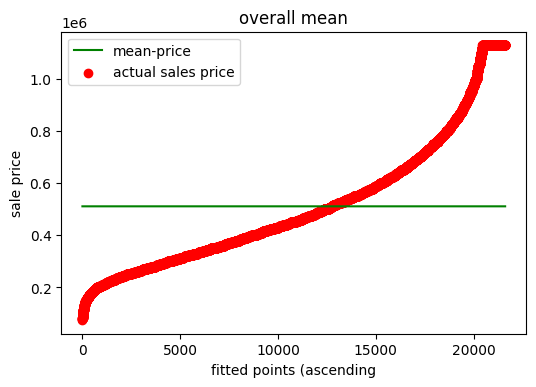

In [14]:
plt.figure(dpi=100)
k = range(0, len(data))
plt.scatter(k, data['Sale_Price'].sort_values(),color = 'red', label = 'actual sales price')
plt.plot(k, data['mean_sales'].sort_values(),color = 'green', label = 'mean-price')
plt.xlabel('fitted points (ascending')
plt.ylabel('sale price')
plt.title('overall mean')
plt.legend()

In [18]:
# we can improve our mean prediction by calculating the average of sales price with the overall grade of the house. ex- virat kohli may perform differently against different teams so we calulate the average against different teams and try to analyze it, it will give us better prediction of his score.
grades_mean = data.pivot_table(values = 'Sale_Price', columns='Overall Grade', aggfunc=np.mean)

In [19]:
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [22]:
data['grade_mean'] = 0

for i in grades_mean.columns:
  data['grade_mean'][data['Overall Grade']==i] = grades_mean[i][0] 
  # jis row me data['Overall Grade']==i ka value satisfy hoga, whi pe jake value store hoga.
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
data['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [24]:
# plotting residual plot for analyzing the data
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference  = data['grade_mean'] - data['Sale_Price']

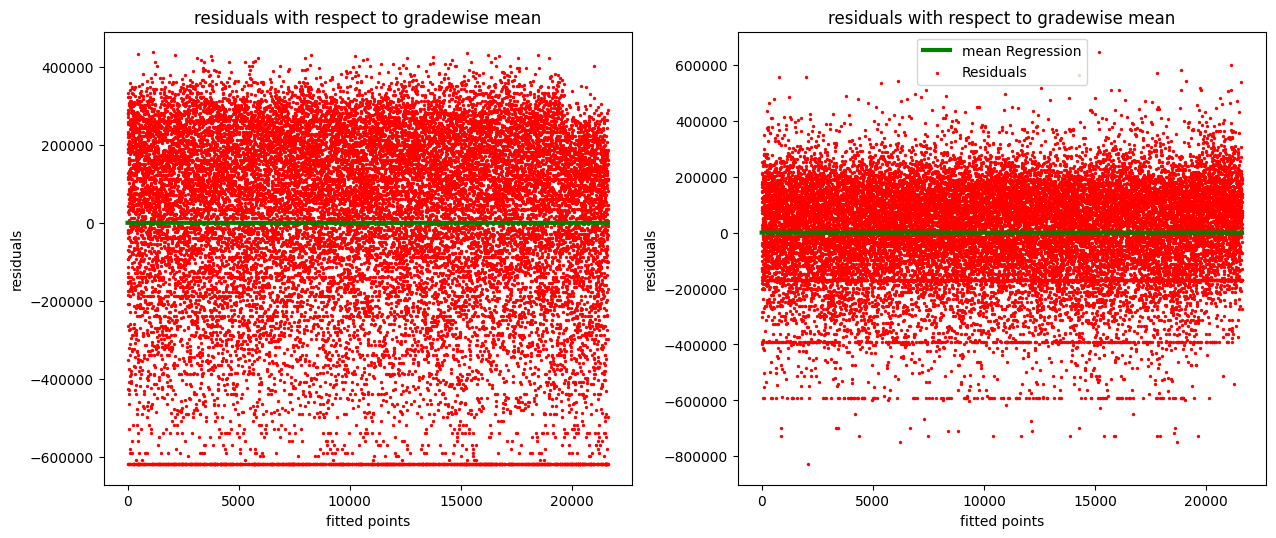

In [27]:
k = range(0, len(data))
l = [0 for i in range(len(data))]
plt.figure(figsize=(15,6), dpi = 100)

plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color='red', label='Residuals', s=2)
plt.plot(k,l,color = 'green', label = 'mean_Regression', linewidth = 3)
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('residuals with respect to gradewise mean')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color ='red', label = 'Residuals', s=2)
plt.plot(k, l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.legend()
plt.title('residuals with respect to gradewise mean')
plt.legend()

mean absolute error

In [28]:
  cost  = sum(mean_difference)/len(data)
  print(round(cost,7)) # the result here is misleading because some of our residuals are positive and some are negative, that's why they cancel out and final some comes out to be zero.
  

0.0


In [29]:
y = data['Sale_Price']
y_hat1 = data['mean_sales']
y_hat2 = data['grade_mean']
n = len(data)

len(y), len(y_hat1), len(y_hat2), n

(21609, 21609, 21609, 21609)

In [30]:
# we will take the absolute value of the difference
cost_mean = sum(abs(y_hat1-y))/n
cost_mean

199168.78146839526

In [31]:
cost_grade_mean  = sum(abs(y_hat2-y))/n
cost_grade_mean

137081.70298203363

In [ ]:
# there above two models confirm that cost_grade_mean model is better than cost_model
#hurray, we took out the mathematical comparision between them.

In [32]:
# we can also calculate this mean absolute error using scikit learn library
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(y_hat2,y)
cost_grade_mean

137081.7029820291

mean squared error

In [33]:
from sklearn.metrics import  mean_squared_error
cost_mean = mean_squared_error(y_hat1,y)
cost_grade_mean = mean_squared_error(y_hat2, y)
cost_mean, cost_grade_mean
# here we can clearly see , the value corresponding to the first model is signifiantly larger than the second model.

(62528116847.799576, 30804835720.342426)

root mean square error

In [35]:
from sklearn.metrics import mean_squared_error
cost_grade_mean = mean_squared_error(y_hat2,y)**0.5
cost_mean = mean_squared_error(y_hat1,y)**0.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

calculating R^2 value

In [38]:
y = data['Sale_Price']
y_bar = data['mean_sales']
y_hat = data['grade_mean']
n = len(data)
len(y), len(y_bar), len(y_hat), n

(21609, 21609, 21609, 21609)

In [39]:
mse_mean = mean_squared_error(y_bar,y)
mse_mean

62528116847.799576

In [40]:
mse_model   = mean_squared_error(y_hat,y)
mse_model

30804835720.342426

In [44]:
R2 = 1 - (mse_model)/(mse_mean)
R2
# this model is 50 percent accurate.
# the higher is the R^2 value, the better is the model.

0.5073442592981836

In [46]:
# there is a drawback of R^2, therefore we use adjusted R^2 , which we'll study later.